In [411]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import numpy as np
from numpy.linalg import eig

def read_graph(fake = True):
    global edges
    if(fake):
        edges = [(1, 2), (2,3), (3,4), (3,5), (4,5), (1,6),(2,6)]
        G = nx.Graph()
        G.add_edges_from(edges)
        return G
    else:
        file_path = 'data/example2.dat'

        # Reading the file and creating edges
        with open(file_path, 'r') as file:
            edges = [tuple(list(map(int, line.strip().split(',')))[:2]) for line in file if line.strip()]

        G = nx.Graph()
        G.add_edges_from(edges)

        return G


In [412]:
G =read_graph(False)

In [413]:
G

In [414]:

# Get adjacency matrix
A = nx.adjacency_matrix(G).toarray()
A

#Sparse matrix


array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [415]:



w,v=eig(A)
print('E-value:', w)
print('E-vector', v)

E-value: [ 2.47740948e+01  2.03110207e+01 -7.83864345e+00 -7.37275129e+00
  6.75563423e+00  6.53155769e+00 -6.82043023e+00 -6.61798884e+00
 -6.54761745e+00  6.13891604e+00  5.86897712e+00  5.82783277e+00
  5.59928853e+00  5.38376845e+00  5.12723483e+00  5.02151342e+00
  4.84277235e+00 -6.08155505e+00 -5.87745457e+00 -5.80082362e+00
 -5.64310711e+00 -5.50262478e+00 -5.32104501e+00  4.62020292e+00
  4.49955216e+00  4.33289223e+00 -5.10081833e+00  4.18394888e+00
 -4.98885967e+00 -4.86590836e+00 -4.81545922e+00  4.04563930e+00
 -4.63179074e+00 -4.54418325e+00 -4.42654597e+00 -4.45207628e+00
  3.70351248e+00  3.57259352e+00  3.47222723e+00  3.40168732e+00
 -4.14767807e+00 -4.16766936e+00 -4.00909854e+00 -3.90436385e+00
  3.14623635e+00  3.08241065e+00  2.94741051e+00 -3.79146740e+00
  2.82985343e+00 -3.56677475e+00  2.60175460e+00 -3.45509185e+00
 -3.30404603e+00 -3.28650556e+00  2.45476231e+00  2.41775637e+00
  2.17584878e+00 -2.81826783e+00 -2.94357202e+00 -2.97753705e+00
 -3.06534619e+00

In [416]:

def kEigenvector(k):
    global A
    # Step 2: Define D to be the diagonal matrix and construct the matrix L

    #print("Adjacency Matrix:", A)   
    degree_matrix = np.diag(A.sum(axis=1))
    #print("Degree Matrix:", degree_matrix)
    D_inv_sqrt = np.diag(1 / np.sqrt(degree_matrix.diagonal()))
    #print("D_inv_sqrt:", D_inv_sqrt)
    laplacian_matrix = D_inv_sqrt @ A @ D_inv_sqrt 
    
    # Step 3: Find the k largest eigenvectors of L
    eigenvalues, eigenvectors = eigh(laplacian_matrix)
    
    print('Eigenvectors:', eigenvectors)
    print('Eigenvalues:', eigenvalues)
    X = eigenvectors[-k:,:].T
    # swap columns
    X = np.fliplr(X)

    print(X)

    # Step 4: Normalize the rows to have norm 1
    X = normalize(X, norm='l2', axis=1)

    # Step 5: Cluster the rows of X using k-means
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    print(labels)
    print(len(labels))
    return labels

Eigenvectors: [[-0.09217852 -0.15971232  0.00160289 ...  0.00863304  0.09427614
  -0.0838487 ]
 [ 0.02377069  0.07093853  0.11407421 ...  0.07419364  0.10712526
  -0.09752945]
 [ 0.16389911  0.00531967 -0.17520323 ... -0.17842578  0.09610471
  -0.0862796 ]
 ...
 [-0.03287347 -0.0039915   0.06086161 ...  0.04654693 -0.10170737
  -0.09094668]
 [ 0.0243153   0.08344021  0.0400635  ... -0.04676714 -0.11821653
  -0.10168148]
 [-0.0145463  -0.01204847  0.03693465 ...  0.04625802 -0.10912033
  -0.08134518]]
Eigenvalues: [-3.26154151e-01 -3.09745777e-01 -2.85762816e-01 -2.70777577e-01
 -2.60609245e-01 -2.58968057e-01 -2.46060830e-01 -2.43456905e-01
 -2.39827442e-01 -2.29656760e-01 -2.26831644e-01 -2.14665872e-01
 -2.09072532e-01 -2.01449175e-01 -2.00839382e-01 -1.98561897e-01
 -1.87517684e-01 -1.86077729e-01 -1.81789185e-01 -1.73773578e-01
 -1.70715633e-01 -1.66012359e-01 -1.62869151e-01 -1.59164628e-01
 -1.49680316e-01 -1.41246953e-01 -1.40353626e-01 -1.37134896e-01
 -1.35339957e-01 -1.223025

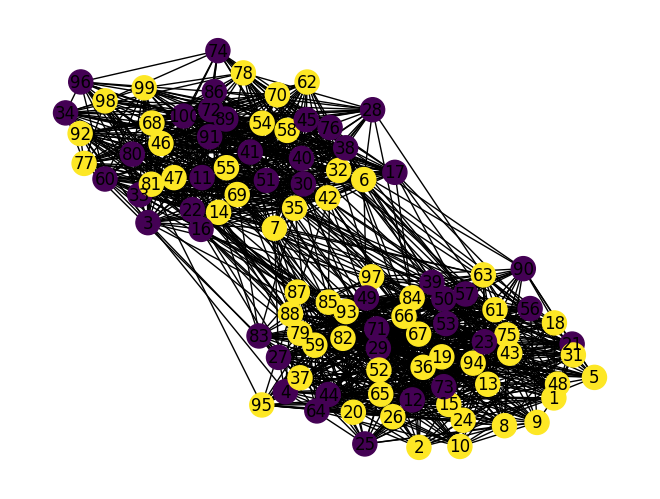

In [417]:
labels = kEigenvector(2)


#Function that takes the labels from KMean and plots the graph
def plotGraph(labels):
    global edges
    G = nx.Graph()
    G.add_edges_from(edges)
    nx.draw(G, node_color=labels, with_labels=True)
    plt.show()

plotGraph(labels)